# SCC-ICMC-USP  


# CURSO 2 - CD-AM-DM
# EXERCICIO DE FIXAÇÃO - 2A. QUINZENA

# OBJETIVO - **COMITES DE ÁRVORES DE DECISÃO**

# Profa. Roseli A. F. Romero

---

### Objetivos:
- Fazer exploração e préprocessamento dos dados utilizando onehot encoding e padronização
- Testar os algoritmos DecisionTree, RandomForests e XGB utilizando métricas RMSE e R2

### Base:

Considere o arquivo `houses_to_rent_v2.csv`. Esta base tem dados de imóveis para 5 cidades do Brasil. Esta base pode ser usada tanto pelo proprietário quanto pelo locatário. Pretende-se que um proprietario
tenha uma estimativa do preço que pode alugar seu imóvel, através de seus atributos. Por outro lado, pretende-se que um locatário possa estimar se o aluguel é condizente.

### Questão 1 
 Para esta questão vc deve:
 - Remover do conjunto os atributos: "area", "floor", "animal", "hoa (R\\$)", "total (R\\$)", "property tax (R\\$)"
 
 

 ### Questão 2 - Separar o conjunto em 80% treinamento e 20% teste

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np

data = pd.read_csv('houses_to_rent_v2.csv', na_values='-')
# Vamos ignorar algumas colunas para simplificar o problema
data = data.drop(["area", "floor", "animal", "hoa (R$)", "total (R$)", "property tax (R$)"], axis=1)

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)
train_data

,city,rooms,bathroom,parking spaces,furniture,rent amount (R$),fire insurance (R$)
0,São Paulo,3,4,3,furnished,8500,33
1,São Paulo,3,2,2,not furnished,2300,35
2,Campinas,1,1,0,not furnished,500,7
3,Porto Alegre,1,1,1,furnished,2400,36
4,São Paulo,2,2,1,not furnished,1700,22
...,...,...,...,...,...,...,...
8548,São Paulo,1,1,0,furnished,2100,27
8549,São Paulo,3,2,2,not furnished,3800,49
8550,Rio de Janeiro,2,2,0,furnished,4700,61
8551,São Paulo,1,1,1,furnished,2600,33


In [2]:
test_data

,city,rooms,bathroom,parking spaces,furniture,rent amount (R$),fire insurance (R$)
0,Campinas,3,3,2,not furnished,2500,32
1,Rio de Janeiro,2,1,1,not furnished,1900,25
2,Campinas,2,2,1,furnished,2000,26
3,Belo Horizonte,3,2,1,not furnished,1400,19
4,São Paulo,4,2,0,not furnished,15000,191
...,...,...,...,...,...,...,...
2134,São Paulo,5,4,4,not furnished,4600,70
2135,Porto Alegre,3,1,1,not furnished,1240,19
2136,Campinas,2,1,1,not furnished,1000,13
2137,Porto Alegre,3,2,1,furnished,2900,43


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8553 entries, 0 to 8552
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 8553 non-null   object
 1   rooms                8553 non-null   int64 
 2   bathroom             8553 non-null   int64 
 3   parking spaces       8553 non-null   int64 
 4   furniture            8553 non-null   object
 5   rent amount (R$)     8553 non-null   int64 
 6   fire insurance (R$)  8553 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 467.9+ KB


### Questão 3 - Verificar se existem valores nulos.

In [4]:
train_data.isnull().sum()

city                   0
rooms                  0
bathroom               0
parking spaces         0
furniture              0
rent amount (R$)       0
fire insurance (R$)    0
dtype: int64

### Questão 4 - Remover os outliers do conjunto em relação ao atributo rent amount (considere um outlier o dado que estiver a mais de Q3 + 1.5 * IQR ou a menos que Q1 - 1.5 * IQR, onde Q1 e Q3 são o primeiro e terceiro quartis, respectivamente, e IQR= Q3 - Q1). Note que é interessante fazer a análise dos outliers separadamente para cada cidade, pois há grande variação do aluguel entre cidades.

- Utilize [Pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) e [ColunmTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) para padronizar os dados numéricos e aplicar one hot encoding nos categóricos. 

Vamos limpar os dados para que fiquem sem outliers em relação ao atributo rent amount. Os outliers serão analisados no contexto de cada cidade, pois o aluguel entre as cidades pode possuir grande variação.


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Obliquidade por cidade:
city
Belo Horizonte    1.748219
Campinas          2.689998
Porto Alegre      3.184732
Rio de Janeiro    2.208262
São Paulo         1.625930
Name: rent amount (R$), dtype: float64


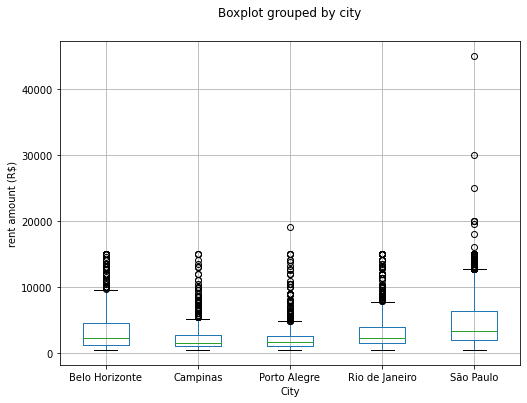

In [5]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(8,6))
ax = fig.gca()  
train_data[['city','rent amount (R$)']].boxplot(by='city', ax=ax)
ax.set_title('') # Give the plot a main title
ax.set_xlabel('City') # Set text for the x axis
ax.set_ylabel('rent amount (R$)')# Set text for y axis
print("Obliquidade por cidade:")
print(train_data.groupby("city")['rent amount (R$)'].skew())

In [6]:
# Primeiro vamos criar um agrupamento por cidades, para facilitar a manipulação:
city_group = train_data.groupby('city')['rent amount (R$)']

# Analisando o primeiro e terceiro quartil de cada cidade:
Q1 = city_group.quantile(.25)
Q3 = city_group.quantile(.75)
print("Primeiro quartil:")
print(Q1)
print("\nTerceiro quartil:")
print(Q3)

Primeiro quartil:
city
Belo Horizonte    1250.0
Campinas          1000.0
Porto Alegre      1100.0
Rio de Janeiro    1500.0
São Paulo         2000.0
Name: rent amount (R$), dtype: float64

Terceiro quartil:
city
Belo Horizonte    4600.0
Campinas          2692.5
Porto Alegre      2600.0
Rio de Janeiro    4000.0
São Paulo         6292.5
Name: rent amount (R$), dtype: float64


Calculando o intervalo entre quartis (IQR) para calculo do limite superior e inferior:

In [7]:
# IQR = Interquartile Range
IQR = Q3 - Q1

# Limites
inferior = Q1 - 1.5 * IQR
superior = Q3 + 1.5 * IQR
print("Limites inferiores:")
print(inferior)
print("\nLimites superiores:")
print(superior)

Limites inferiores:
city
Belo Horizonte   -3775.00
Campinas         -1538.75
Porto Alegre     -1150.00
Rio de Janeiro   -2250.00
São Paulo        -4438.75
Name: rent amount (R$), dtype: float64

Limites superiores:
city
Belo Horizonte     9625.00
Campinas           5231.25
Porto Alegre       4850.00
Rio de Janeiro     7750.00
São Paulo         12731.25
Name: rent amount (R$), dtype: float64


Removendo os outliers:

In [10]:
indices_a_remover = []
# Itera através das cidades agrupadas:
for cidade in city_group.groups.keys():
# for cidade in ["Campinas"]:
    lim_inferior = inferior[cidade]
    lim_superior = superior[cidade]
    # Usa-se @ dentro da query para acessar uma variável. Para atributos com espaço, deve-se
    # usar o caractere ` entre o nome do atributo.
    query_filtro = '(city==@cidade) & ( (`rent amount (R$)` < @lim_inferior) | (`rent amount (R$)` > @lim_superior) )'
    # Nosso query irá selecionar tuplas em que rent amount seja menor que o limite inferior e
    # maior que o limite superior. Lembrando que apenas devemos selecionar entre as tuplas da
    # cidade em que estamos analisando
    fora_do_limite = train_data.query(query_filtro)
    # Adicionamos os índices das tuplas fora dos limites à nossa lista de itens a serem removidos:
    indices_a_remover += fora_do_limite.index.tolist()
    
# Removendo todos os dados fora dos limites:
train_data_clean = train_data.drop(indices_a_remover)
train_data_clean.reset_index(drop=True, inplace=True)

Vamos agora comparar o efeito da remoção dos outliers:

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Obliquidade por cidade dados originais:
city
Belo Horizonte    1.748219
Campinas          2.689998
Porto Alegre      3.184732
Rio de Janeiro    2.208262
São Paulo         1.625930
Name: rent amount (R$), dtype: float64

Obliquidade por cidade dados limpos:
city
Belo Horizonte    1.285605
Campinas          1.231543
Porto Alegre      1.047143
Rio de Janeiro    1.168908
São Paulo         1.110598
Name: rent amount (R$), dtype: float64


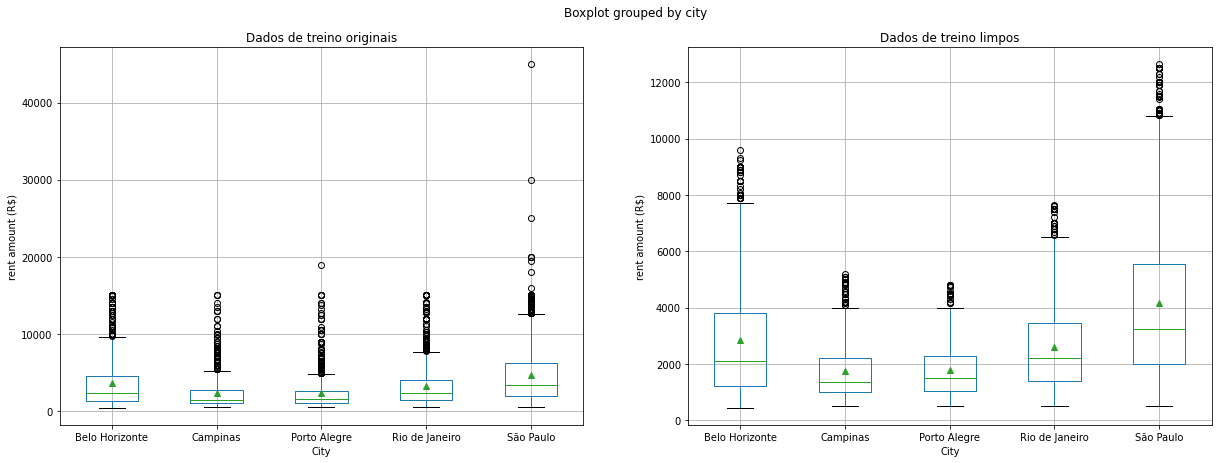

In [11]:
fig = plt.figure(figsize=(20,7))

plt.subplot(1, 2, 1)
ax = fig.gca()

train_data[['city','rent amount (R$)']].boxplot(by='city', ax=ax, showmeans=True)
ax.set_title('Dados de treino originais') # Give the plot a main title
ax.set_xlabel('City') # Set text for the x axis
ax.set_ylabel('rent amount (R$)')# Set text for y axis
print("Obliquidade por cidade dados originais:")
print(train_data.groupby("city")['rent amount (R$)'].skew())

plt.subplot(1, 2, 2)
ax = fig.gca()
train_data_clean[['city','rent amount (R$)']].boxplot(by='city', ax=ax, showmeans=True)
ax.set_title('Dados de treino limpos') # Give the plot a main title
ax.set_xlabel('City') # Set text for the x axis
ax.set_ylabel('rent amount (R$)')# Set text for y axis
print("\nObliquidade por cidade dados limpos:")
print(train_data_clean.groupby("city")['rent amount (R$)'].skew())

Note que ainda há outliers no nosso conjunto. Porém, eles não são tão severos quanto anteriormente. Ainda observa-se outliers pois nossa distribuição original era muito assimétrica.

- _Utilize [Pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) e [ColunmTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) para padronizar os dados numéricos e aplicar one hot encoding nos categóricos._

Vamos agora padronizar nossos dados numéricos e transformar nossos atributos categóricos em representações OneHot

In [12]:
X_train = train_data_clean.drop(["rent amount (R$)"], axis=1)
y_train = train_data_clean["rent amount (R$)"]

X_test = test_data.drop(["rent amount (R$)"], axis=1)
y_test = test_data["rent amount (R$)"]

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7998 entries, 0 to 7997
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 7998 non-null   object
 1   rooms                7998 non-null   int64 
 2   bathroom             7998 non-null   int64 
 3   parking spaces       7998 non-null   int64 
 4   furniture            7998 non-null   object
 5   fire insurance (R$)  7998 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 375.0+ KB


In [13]:
# O método select dtypes irá selecionar os atributos que satisfizerem nossas condições:
features_numericas = X_train.select_dtypes(exclude=['object']).columns
features_categoricas = X_train.select_dtypes(include=['object']).columns

features_numericas = features_numericas.tolist()
features_categoricas = features_categoricas.tolist()

print("Features numéricas: ", features_numericas)
print("Features categóricas: ", features_categoricas)

Features numéricas:  ['rooms', 'bathroom', 'parking spaces', 'fire insurance (R$)']
Features categóricas:  ['city', 'furniture']


Vamos criar pipelines (sequencias de transformações) para simplificar nossas operações de preprocessamento dos dados:

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Criamos um pipeline para processar dados categóricos
catTransformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Criamos um pipeline para processar dados numéricos
numTransformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Para processar as colunas do nosso dataset, vamos atribuir um pipeline às colunas
# apropriadas com a classe ColumnTransformer:
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numTransformer, features_numericas),
        ('categoric', catTransformer, features_categoricas)
    ])

### Questão 5

Treine dois modelos de regressão, o `DecisionTreeRegressor`  no conjunto de treino e calcule as métricas Root Mean Squared Error (RMSE) e R2 no conjunto de teste. Lembre-se de aplicar os pipelines criados na questão anterior.

In [16]:
from sklearn.tree import DecisionTreeRegressor

estimator_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

estimator_dt.fit(X_train, y_train)
y_pred_dt = estimator_dt.predict(X_test)

resultados = {}

name = "Decision tree"
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2 = r2_score(y_test, y_pred_dt)
print('RMSE: ', rmse)
print('R2: ', r2)

resultados[name] = {}
resultados[name]["rmse"] = rmse
resultados[name]["r2"] = r2

RMSE:  674.1984220157917
R2:  0.9588520689745972


### Questão 6

Treine um modelo de regressão usando o `RandomForestRegressor` no conjunto de treino e calcule as métricas Root Mean Squared Error (RMSE) e R2 no conjunto de teste. Lembre-se de aplicar os pipelines criados na questão 4.

In [17]:
from sklearn.ensemble import RandomForestRegressor
 
estimator_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

estimator_rf.fit(X_train, y_train)
y_pred_rf = estimator_rf.predict(X_test)
name = "Random forest"
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)
print('RMSE: ', rmse)
print('R2: ', r2)

resultados[name] = {}
resultados[name]["rmse"] = rmse
resultados[name]["r2"] = r2

RMSE:  670.5569707510025
R2:  0.9592953614263239


### Questão 7

Treine um modelo de regressão com o método XGBoost, no conjunto de treino e calcule o Mean Squared Error (MSE) e o R2 no conjunto de teste.

- Dica: Utilize `xgboost.XGBRegressor`

In [18]:
import xgboost as xgb


estimator_xg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(random_state=42))
])

estimator_xg.fit(X_train, y_train)
y_pred_rg = estimator_xg.predict(X_test)
name = "XGB"
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rg))
r2 = r2_score(y_test, y_pred_rg)
print('RMSE: ', rmse)
print('R2: ', r2)

resultados[name] = {}
resultados[name]["rmse"] = rmse
resultados[name]["r2"] = r2

[13:57:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE:  697.9144844073091
R2:  0.955906257337986


### Questão 8

Compare os resultados obtidos pelos 3 classificadores das questões anteriores. 


In [19]:
for modelo in resultados:
    print("Modelo:", modelo)
    print("\tScore RMSE:", resultados[modelo]["rmse"].round(2))
    print("\tScore R2:", resultados[modelo]["r2"].round(6))

Modelo: Decision tree
	Score RMSE: 674.2
	Score R2: 0.958852
Modelo: Random forest
	Score RMSE: 670.56
	Score R2: 0.959295
Modelo: XGB
	Score RMSE: 697.91
	Score R2: 0.955906


Podemos observar que o algoritmo RandomForest apresentou um erro RMSE menor que os demais regressores. No entanto, todos eles apresentaram um valor R2 próximos.

### Questão 9

Verifique a importância de cada feature para o modelo que apresentou melhor métrica R2. O que isso diz sobre o problema que estamos tentando resolver?

In [21]:
estimator_rf.named_steps['regressor'].feature_importances_.round(3)

array([0.002, 0.002, 0.003, 0.986, 0.001, 0.   , 0.001, 0.   , 0.001,
       0.001, 0.001])

Basicamente o valor do quarto atributo domina a decisão do modelo, fazendo com que mudança dos outros atributos muitas vezes não afete a predição.